In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import sys

In [2]:
menu = pd.read_csv("McD menu.csv")
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
print(menu.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


In [4]:
menu.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


In [5]:
menu.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [6]:
menu["Category"].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [7]:
category = np.unique(menu["Category"].values)
print(category)
cat1 = menu.loc[menu["Category"]=="Coffee & Tea"]
cal_coffee= cat1["Calories"].mean()
cat2 = menu.loc[menu["Category"]=="Breakfast"]
cal_breakfast = cat2["Calories"].mean()
cat3 = menu.loc[menu["Category"]=="Smoothies & Shakes"]
cal_smoothies = cat3["Calories"].mean()
cat4 = menu.loc[menu["Category"]=="Chicken & Fish"]
cal_chicken = cat4["Calories"].mean()
cat5 = menu.loc[menu["Category"]=="Beverages"]
cal_beverages = cat5["Calories"].mean()
cat6 = menu.loc[menu["Category"]=="Beef & Pork"]
cal_beef = cat6["Calories"].mean()
cat7 = menu.loc[menu["Category"]=="Snacks & Sides"]
cal_snacks = cat7["Calories"].mean()
cat8 = menu.loc[menu["Category"]=="Desserts"]
cal_desserts = cat8["Calories"].mean()
cat9 = menu.loc[menu["Category"]=="Salads"]
cal_salads = cat9["Calories"].mean()
print("mean calory of coffee & tea =", cal_coffee)
print("mean calory of breakfast =", cal_breakfast)
print("mean calory of smoothies & shakes =", cal_smoothies)
print("mean calory of chicken & fish =", cal_chicken)
print("mean calory of beverages =", cal_beverages)
print("mean calory of beef & pork =", cal_beef)
print("mean calory of snacks & sides =", cal_snacks)
print("mean calory of desserts =", cal_desserts)
print("mean calory of salads =", cal_salads)
print("mean calories all dish categories:", menu["Calories"].mean())

['Beef & Pork' 'Beverages' 'Breakfast' 'Chicken & Fish' 'Coffee & Tea'
 'Desserts' 'Salads' 'Smoothies & Shakes' 'Snacks & Sides']
mean calory of coffee & tea = 283.89473684210526
mean calory of breakfast = 526.6666666666666
mean calory of smoothies & shakes = 531.4285714285714
mean calory of chicken & fish = 552.9629629629629
mean calory of beverages = 113.70370370370371
mean calory of beef & pork = 494.0
mean calory of snacks & sides = 245.76923076923077
mean calory of desserts = 222.14285714285714
mean calory of salads = 270.0
mean calories all dish categories: 368.2692307692308


In [8]:
mean_per_category = np.array((cal_beef, cal_beverages, cal_breakfast, cal_chicken, cal_coffee, cal_desserts, cal_salads, cal_smoothies, cal_snacks))
print(mean_per_category)

[494.         113.7037037  526.66666667 552.96296296 283.89473684
 222.14285714 270.         531.42857143 245.76923077]


### How many calories does the average McDonald's value meal contain?

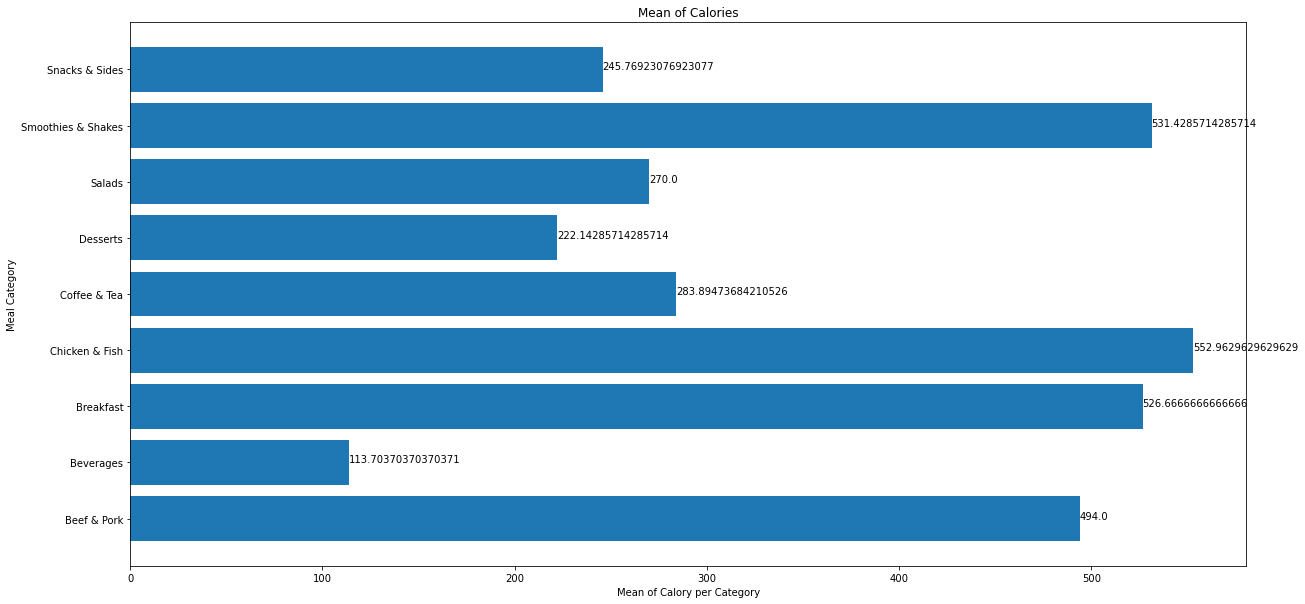

In [9]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20, 10))
x = category
y = mean_per_category
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.title("Mean of Calories")
plt.xlabel("Mean of Calory per Category")
plt.ylabel("Meal Category")
plt.show()

### How much do beverages, like soda or coffee, contribute to the overall caloric intake?

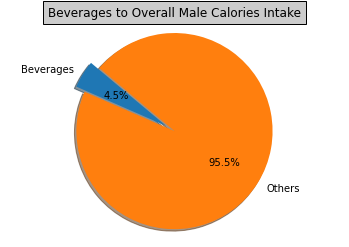

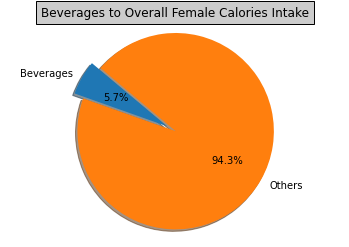

In [10]:
df_beverages = menu.loc[menu["Category"]=="Beverages"]
male_calories_intake = 2500
female_calories_intake = 2000
beverages_to_male_calories_intake = (df_beverages["Calories"].mean()/male_calories_intake)*100
beverages_to_female_calories_intake = (df_beverages["Calories"].mean()/female_calories_intake)*100
sisa_male=100-beverages_to_male_calories_intake
sisa_female=100-beverages_to_female_calories_intake
#plot to male calories
labels = 'Beverages', 'Others'
sizes = [beverages_to_male_calories_intake, sisa_male]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Beverages to Overall Male Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
#plot to female calories
labels = 'Beverages', 'Others'
sizes = [beverages_to_female_calories_intake, sisa_female]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Beverages to Overall Female Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

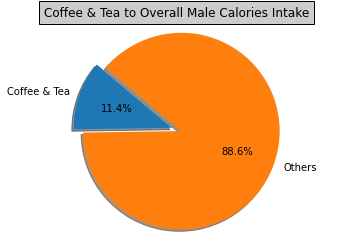

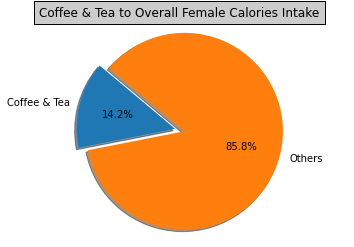

In [11]:
df_coffee = menu.loc[menu["Category"]=="Coffee & Tea"]
male_calories_intake = 2500
female_calories_intake = 2000
coffee_to_male_calories_intake = (df_coffee["Calories"].mean()/male_calories_intake)*100
coffee_to_female_calories_intake = (df_coffee["Calories"].mean()/female_calories_intake)*100
sisa_male=100-coffee_to_male_calories_intake
sisa_female=100-coffee_to_female_calories_intake
#plot to male calories
labels = 'Coffee & Tea', 'Others'
sizes = [coffee_to_male_calories_intake, sisa_male]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Coffee & Tea to Overall Male Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
#plot to female calories
labels = 'Coffee & Tea', 'Others'
sizes = [coffee_to_female_calories_intake, sisa_female]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Coffee & Tea to Overall Female Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

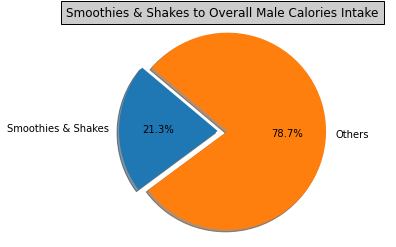

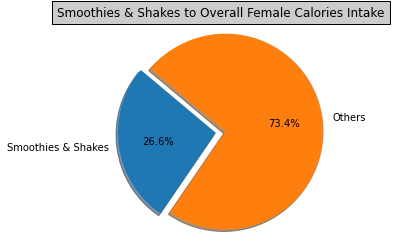

In [12]:
df_smoothies = menu.loc[menu["Category"]=="Smoothies & Shakes"]
male_calories_intake = 2500
female_calories_intake = 2000
smoothies_to_male_calories_intake = (df_smoothies["Calories"].mean()/male_calories_intake)*100
smoothies_to_female_calories_intake = (df_smoothies["Calories"].mean()/female_calories_intake)*100
sisa_male=100-smoothies_to_male_calories_intake
sisa_female=100-smoothies_to_female_calories_intake
#plot to male calories
labels = 'Smoothies & Shakes', 'Others'
sizes = [smoothies_to_male_calories_intake, sisa_male]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Smoothies & Shakes to Overall Male Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
#plot to female calories
labels = 'Smoothies & Shakes', 'Others'
sizes = [smoothies_to_female_calories_intake, sisa_female]
explode = (0.1, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Smoothies & Shakes to Overall Female Calories Intake", bbox={'facecolor':'0.8', 'pad':5})
plt.show()